In [49]:
import wrangle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

pd.options.display.float_format = '{:20,.2f}'.format



In [13]:
df = wrangle.get_zillow()
df = wrangle.prep_zillow(df)
df = wrangle.remove_outliers(df)

In [14]:
train, validate, test = wrangle.my_split(df)

In [21]:
train.head()

,parcelid,bathrooms,bedrooms,sqft,county,fullbathcnt,latitude,garagecarcnt,garagesqft,longitude,...,regionidzip,structuretaxvalue,taxvalue,landtaxvalue,taxamount,logerror,age,Los Angeles,Orange,Ventura
23592,11804374,1.00,1.00,750.00,Los Angeles,1.00,34.03,0.00,0.00,-118.20,...,"96,004.00","16,172.00","30,233.00","14,061.00",494.98,-0.10,95.00,1,0,0
39939,10808842,2.00,2.00,"1,800.00",Los Angeles,2.00,34.16,0.00,0.00,-118.61,...,"96,387.00","120,666.00","452,500.00","331,834.00","5,610.76",0.14,73.00,1,0,0
30298,14173538,2.50,4.00,"2,688.00",Orange,2.00,33.91,2.00,586.00,-117.87,...,"97,043.00","374,608.00","687,061.00","312,453.00","7,738.66",0.00,21.00,0,1,0
27701,12721665,1.00,3.00,"1,067.00",Los Angeles,1.00,33.93,0.00,0.00,-118.09,...,"96,201.00","167,643.00","356,507.00","188,864.00","4,762.89",0.00,69.00,1,0,0
7352,13080627,2.00,3.00,"1,557.00",Los Angeles,2.00,34.01,0.00,0.00,-117.87,...,"96,522.00","221,862.00","438,313.00","216,451.00","5,185.86",0.04,33.00,1,0,0


In [29]:
df['abserror']=abs(df.logerror)

In [37]:
loc_= train[['longitude','latitude','logerror']]
loc_.head()

,longitude,latitude,logerror
23694,-118.20,34.03,-0.10
40059,-118.61,34.16,0.14
30411,-117.87,33.91,0.00
27811,-118.09,33.93,0.00
7397,-117.87,34.01,0.04


In [38]:

 

kmeans=KMeans(n_clusters=30)
kmeans.fit(loc_)

kmeans.predict(loc_)



array([ 8,  2, 24, ..., 29, 13, 18], dtype=int32)

In [39]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=loc_.columns)
centroids


,longitude,latitude,logerror
0,-118.30,34.04,-0.25
1,-117.97,33.91,0.00
2,-118.59,34.20,0.04
3,-118.97,34.24,0.01
4,-117.84,33.70,0.00
5,-118.13,34.63,0.00
6,-118.86,34.24,1.52
7,-118.40,34.02,0.01
8,-118.26,33.94,-0.02
9,-118.35,34.20,0.55


In [40]:
train['cluster']=kmeans.predict(loc_)

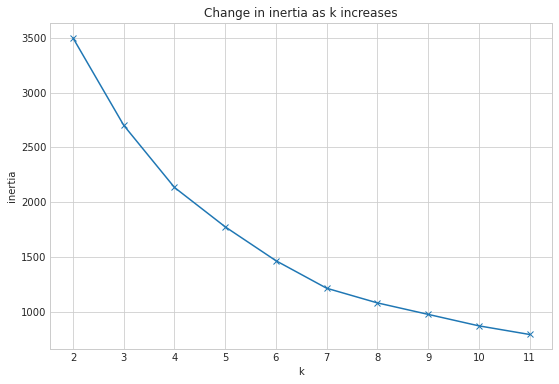

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(loc_).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


Text(0.5, 1.0, 'Visualizing Cluster Centers')

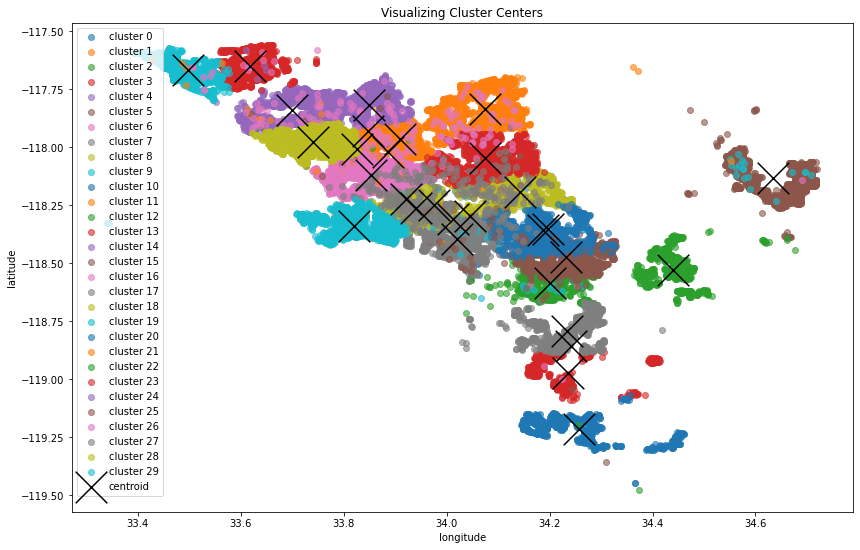

In [42]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.latitude, subset.longitude, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(x='latitude', y='longitude', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Visualizing Cluster Centers')


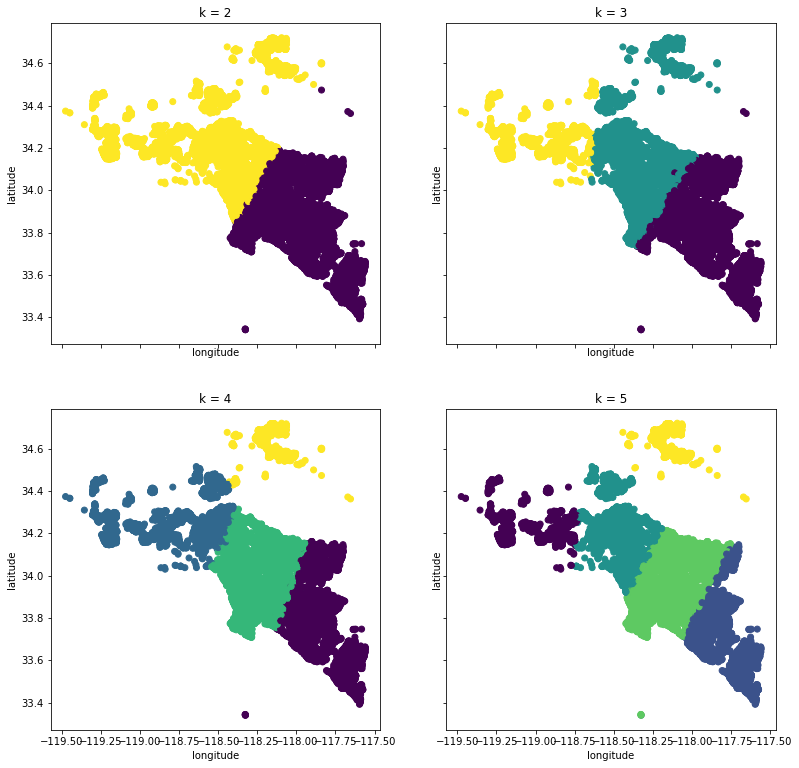

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(loc_).predict(loc_)
    ax.scatter(train.longitude, train.latitude, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='longitude', ylabel='latitude')


In [48]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings

In [38]:
  # create X_train by dropping the target variable 
X_train = train.drop(columns=['logerror'])
# create y_train by keeping only the target variable.
y_train = train[['logerror']]

# create X_validate by dropping the target variable 
X_validate = validate.drop(columns=['logerror'])
# create y_validate by keeping only the target variable.
y_validate = validate[['logerror']]

# create X_test by dropping the target variable 
X_test = test.drop(columns=['logerror'])
# create y_test by keeping only the target variable.
y_test = test[['logerror']]

partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]

In [39]:


train = partitions[0]
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])
partitions[0] = train


In [36]:
train=train.drop(columns=['parcelid','fullbathcnt','garagecarcnt','taxvalue','poolcnt'])

In [41]:
train.head()

,bathrooms,bedrooms,sqft,county,latitude,garagesqft,longitude,lotsize,fireplacecnt,tract,regionidzip,structuretaxvalue,landtaxvalue,taxamount,logerror,age,Los Angeles,Orange,Ventura,logerror_bins
23592,1.00,1.00,750.00,Los Angeles,34.03,0.00,-118.20,"3,956.00",0.00,2048,"96,004.00","16,172.00","14,061.00",494.98,-0.10,95.00,1,0,0,"(-0.2, -0.05]"
39939,2.00,2.00,"1,800.00",Los Angeles,34.16,0.00,-118.61,"6,249.00",0.00,1374,"96,387.00","120,666.00","331,834.00","5,610.76",0.14,73.00,1,0,0,"(0.05, 0.2]"
30298,2.50,4.00,"2,688.00",Orange,33.91,586.00,-117.87,"6,821.00",0.00,117,"97,043.00","374,608.00","312,453.00","7,738.66",0.00,21.00,0,1,0,"(-0.05, 0.05]"
27701,1.00,3.00,"1,067.00",Los Angeles,33.93,0.00,-118.09,"5,377.00",0.00,5028,"96,201.00","167,643.00","188,864.00","4,762.89",0.00,69.00,1,0,0,"(-0.05, 0.05]"
7352,2.00,3.00,"1,557.00",Los Angeles,34.01,0.00,-117.87,"5,881.00",0.00,4034,"96,522.00","221,862.00","216,451.00","5,185.86",0.04,33.00,1,0,0,"(-0.05, 0.05]"


In [177]:
# the variables that need scaling
scaled_vars = ['latitude', 'longitude', 'bathrooms', 'taxamount','age']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])


In [178]:
# list of variables I will cluster on. 
cluster_vars = ['lotsize', 'taxamount', 'garagesqft']
cluster_name = 'older_high_value'
k_range = range(2,20)


In [179]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df


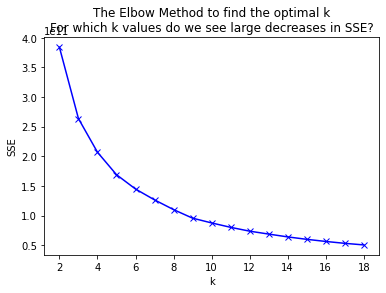

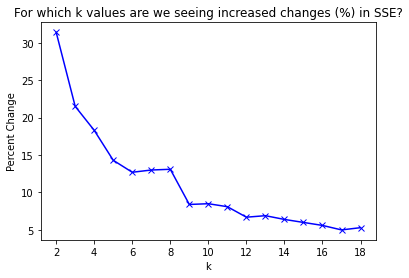

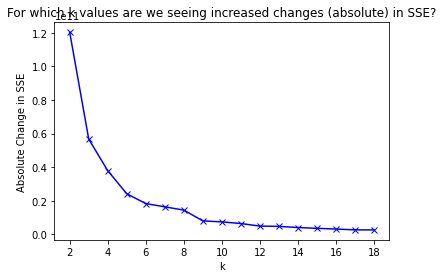

,k,sse,delta,pct_delta
0,2,"384,024,275,913.18","120,397,090,279.00",31.40
1,3,"263,627,185,633.74","56,762,961,933.00",21.50
2,4,"206,864,223,700.47","37,924,856,362.00",18.30
3,5,"168,939,367,338.18","24,190,532,876.00",14.30
4,6,"144,748,834,462.64","18,342,713,408.00",12.70
5,7,"126,406,121,054.26","16,408,444,305.00",13.00
6,8,"109,997,676,748.78","14,443,670,894.00",13.10
7,9,"95,554,005,855.18","8,028,806,174.00",8.40
8,10,"87,525,199,681.33","7,441,922,007.00",8.50
9,11,"80,083,277,674.04","6,463,430,053.00",8.10


In [180]:
find_k(X[0], cluster_vars, k_range)


In [181]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 123)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans


In [182]:
k=5
kmeans = create_clusters(X[0], k, cluster_vars)


In [183]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df


In [184]:
centroid_df

,older_high_value,centroid_lotsize,centroid_taxamount,centroid_age
0,0,"10,114.98","4,156.64",57.35
1,1,"7,388.68","12,276.72",50.89
2,2,"16,964.95","7,529.62",54.52
3,3,"5,893.19","6,212.05",56.76
4,4,"5,923.17","2,386.82",66.03


In [185]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)



In [186]:
X[i]

,parcelid,bathrooms,bedrooms,sqft,county,fullbathcnt,latitude,garagecarcnt,garagesqft,longitude,...,taxamount,age,Los Angeles,Orange,Ventura,scaled_latitude,scaled_longitude,scaled_bathrooms,scaled_taxamount,scaled_age
28826,10956567,2.00,2.00,"1,411.00",Los Angeles,2.00,34.17,0.00,0.00,-118.34,...,"2,627.86",82.00,1,0,0,0.60,0.59,0.22,0.13,0.56
10775,13976146,2.00,4.00,"2,138.00",Orange,2.00,33.71,2.00,528.00,-118.02,...,"4,181.66",57.00,0,1,0,0.27,0.76,0.22,0.21,0.38
27088,12276437,2.00,3.00,"1,398.00",Los Angeles,2.00,33.90,0.00,0.00,-118.24,...,"5,813.38",36.00,1,0,0,0.40,0.65,0.22,0.29,0.22
8852,12685663,2.00,3.00,"1,822.00",Los Angeles,2.00,33.80,0.00,0.00,-118.37,...,"4,494.85",70.00,1,0,0,0.33,0.58,0.22,0.23,0.47
39449,12315181,1.00,2.00,935.00,Los Angeles,1.00,33.94,0.00,0.00,-118.20,...,"3,523.59",75.00,1,0,0,0.44,0.66,0.00,0.18,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18468,10780183,3.00,4.00,"2,483.00",Los Angeles,3.00,34.18,0.00,0.00,-118.53,...,"1,838.79",52.00,1,0,0,0.61,0.49,0.44,0.09,0.34
21186,12413736,3.00,4.00,"1,934.00",Los Angeles,3.00,33.87,0.00,0.00,-118.05,...,"8,338.72",51.00,1,0,0,0.38,0.74,0.44,0.42,0.33
50319,12116015,2.00,3.00,"1,881.00",Los Angeles,2.00,34.17,0.00,0.00,-118.12,...,"1,588.38",101.00,1,0,0,0.60,0.71,0.22,0.08,0.71
20913,10731415,4.00,5.00,"2,862.00",Los Angeles,4.00,34.19,0.00,0.00,-118.62,...,"11,130.32",58.00,1,0,0,0.61,0.45,0.67,0.57,0.38


In [187]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
       
    return X


In [188]:
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)


In [189]:
X[0]

,bathrooms,bedrooms,sqft,county,latitude,garagesqft,longitude,lotsize,fireplacecnt,tract,...,logerror_bins,scaled_latitude,scaled_longitude,scaled_bathrooms,scaled_taxamount,scaled_age,older_high_value,centroid_lotsize,centroid_taxamount,centroid_garagesqft
23592,1.00,1.00,750.00,Los Angeles,34.03,0.00,-118.20,"3,956.00",0.00,2048,...,"(-0.2, -0.05]",0.50,0.66,0.00,0.02,0.66,1,"5,917.36","2,399.42",123.56
39939,2.00,2.00,"1,800.00",Los Angeles,34.16,0.00,-118.61,"6,249.00",0.00,1374,...,"(0.05, 0.2]",0.59,0.45,0.22,0.28,0.50,1,"5,917.36","2,399.42",123.56
30298,2.50,4.00,"2,688.00",Orange,33.91,586.00,-117.87,"6,821.00",0.00,117,...,"(-0.05, 0.05]",0.41,0.84,0.33,0.39,0.11,1,"5,917.36","2,399.42",123.56
27701,1.00,3.00,"1,067.00",Los Angeles,33.93,0.00,-118.09,"5,377.00",0.00,5028,...,"(-0.05, 0.05]",0.43,0.73,0.00,0.24,0.47,1,"5,917.36","2,399.42",123.56
7352,2.00,3.00,"1,557.00",Los Angeles,34.01,0.00,-117.87,"5,881.00",0.00,4034,...,"(-0.05, 0.05]",0.49,0.84,0.22,0.26,0.20,1,"5,917.36","2,399.42",123.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,2.00,3.00,"1,568.00",Los Angeles,34.21,0.00,-118.42,"7,662.00",0.00,1220,...,"(-0.05, 0.05]",0.63,0.55,0.22,0.12,0.43,4,"16,972.17","7,533.71",175.22
27724,2.50,3.00,"1,664.00",Orange,33.88,462.00,-117.85,"4,400.00",0.00,117,...,"(-0.05, 0.05]",0.39,0.85,0.33,0.35,0.22,4,"16,972.17","7,533.71",175.22
21224,1.00,2.00,700.00,Los Angeles,33.91,0.00,-118.37,"5,630.00",0.00,6023,...,"(-0.05, 0.05]",0.41,0.58,0.00,0.09,0.56,4,"16,972.17","7,533.71",175.22
33458,3.00,4.00,"1,875.00",Orange,33.60,483.00,-117.66,"6,600.00",0.00,320,...,"(-0.05, 0.05]",0.18,0.95,0.44,0.04,0.36,4,"16,972.17","7,533.71",175.22


In [190]:
centroid_df

,older_high_value,centroid_lotsize,centroid_taxamount,centroid_garagesqft
0,0,"5,912.64","6,230.12",205.16
1,1,"5,917.36","2,399.42",123.56
2,2,"7,389.66","12,295.39",224.39
3,3,"10,136.22","4,152.03",163.55
4,4,"16,972.17","7,533.71",175.22


In [192]:
pd.DataFrame(X[0].groupby(['older_high_value', 'centroid_taxamount', 'centroid_lotsize', 
                           'centroid_garagesqft'])['older_high_value'].count())


,,,,older_high_value
older_high_value,centroid_taxamount,centroid_lotsize,centroid_garagesqft,
0,"6,230.12","5,912.64",205.16,8662
1,"2,399.42","5,917.36",123.56,11215
2,"12,295.39","7,389.66",224.39,2646
3,"4,152.03","10,136.22",163.55,4284
4,"7,533.71","16,972.17",175.22,1382


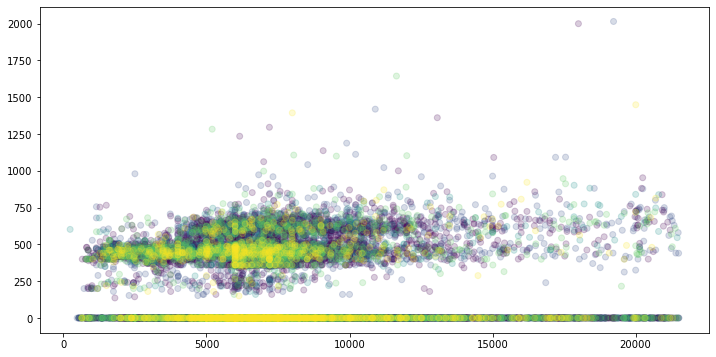

In [194]:
plt.figure(figsize=(12,6))
#plt.scatter(y=X[1].latitude, x=X[1].longitude, c=X[1].area_cluster, alpha=.4)
plt.scatter(y=X[0].garagesqft, x=X[0].lotsize, c=X[0].older_high_value, alpha=.2)



In [ ]:
X_train.head()

,bathrooms,bedrooms,sqft,county,latitude,garagesqft,longitude,lotsize,fireplacecnt,tract,regionidzip,structuretaxvalue,landtaxvalue,taxamount,age,Los Angeles,Orange,Ventura,logerror_bins
23592,1.00,1.00,750.00,Los Angeles,34.03,0.00,-118.20,"3,956.00",0.00,2048,"96,004.00","16,172.00","14,061.00",494.98,95.00,1,0,0,"(-0.2, -0.05]"
39939,2.00,2.00,"1,800.00",Los Angeles,34.16,0.00,-118.61,"6,249.00",0.00,1374,"96,387.00","120,666.00","331,834.00","5,610.76",73.00,1,0,0,"(0.05, 0.2]"
30298,2.50,4.00,"2,688.00",Orange,33.91,586.00,-117.87,"6,821.00",0.00,117,"97,043.00","374,608.00","312,453.00","7,738.66",21.00,0,1,0,"(-0.05, 0.05]"
27701,1.00,3.00,"1,067.00",Los Angeles,33.93,0.00,-118.09,"5,377.00",0.00,5028,"96,201.00","167,643.00","188,864.00","4,762.89",69.00,1,0,0,"(-0.05, 0.05]"
7352,2.00,3.00,"1,557.00",Los Angeles,34.01,0.00,-117.87,"5,881.00",0.00,4034,"96,522.00","221,862.00","216,451.00","5,185.86",33.00,1,0,0,"(-0.05, 0.05]"
